# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [2]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression
train_images_flat = train_images.reshape(60000, -1)
test_images_flat = test_images.reshape(10000, -1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("X train flatten",train_images_flat.shape)
print("X test flatten",test_images_flat.shape)

X train flatten (60000, 784)
X test flatten (10000, 784)


## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [3]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(train_images_flat, np.argmax(train_labels, axis=1))

y_pred = model.predict(test_images_flat)

accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
f1 = f1_score(np.argmax(test_labels, axis=1), y_pred, average='weighted')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 84.39%
F1 Score: 84.31%
Confusion Matrix:
[[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [4]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28, 28)))
model2.add(layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model2.fit(train_images, train_labels, epochs=30, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7178 - loss: 0.8404 - val_accuracy: 0.8281 - val_loss: 0.5015
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8352 - loss: 0.4826 - val_accuracy: 0.8457 - val_loss: 0.4545
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8509 - loss: 0.4370 - val_accuracy: 0.8397 - val_loss: 0.4607
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8505 - loss: 0.4305 - val_accuracy: 0.8537 - val_loss: 0.4274
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8526 - loss: 0.4238 - val_accuracy: 0.8478 - val_loss: 0.4332
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8586 - loss: 0.4081 - val_accuracy: 0.8541 - val_loss: 0.4176
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8609 - loss: 0.4025 - val_accuracy: 0.8433 - val_loss: 0.4428
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8601 - loss: 0.4026 - 

In [5]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.4616
Test accuracy: 83.84%


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


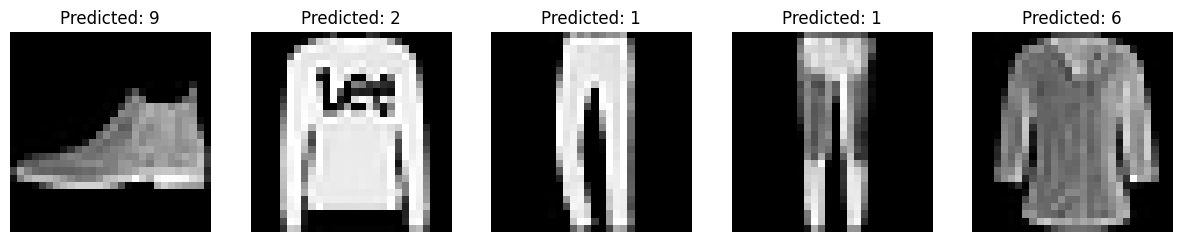

In [7]:
# Visualize Model Predictions
predictions = model2.predict(test_images)
num_images_to_visualize = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_visualize):
  plt.subplot(1, num_images_to_visualize, i + 1)
  plt.imshow(test_images[i], cmap='gray')
  plt.title(f'Predicted: {np.argmax(predictions[i])}')
  plt.axis('off')
plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.